---
# Généralisation et Machine Learning
---

On se propose dans ce TD d'étudier la question de la généralisation du Machine Learning sur quelques exemples: régression et classification.

Le TD est organisé en deux parties:
* une implémentation et analyse de l'exemple de la régression polynomiale vu en cours
* la mise en oeuvre de la validation croisée sur quelques exemples

In [ ]:
# Bibliothèques de base à importer
from IPython.core import error
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

## Régression polynomiale et compromis biais/variance



La régression polynomiale consiste à estimer une fonction à valeurs réelles à partir de quelques points. On utilise comme modèle d'une telle fonction une forme additive:

$$y=f(x)+\epsilon$$

où $f$ est une fonction idéale inconnue et $\epsilon$ est un bruit additif gaussien centré d'écart type $\sigma$: $\epsilon \sim \mathcal{N}(0,\sigma)$.


In [ ]:
# Fonction idéale (sans bruit)
def f(X):
#  return np.sin(0.8*X)
  return np.sqrt(X) * np.sin(X)

# Générateur de données
def samples(f, n_samples = 9, noise = 0.5, x_min = 0, x_max = 10, uniform=True):
  # tri des données pour la visualisation
  if uniform:
    X = np.linspace(x_min, x_max, n_samples)
  else:
    X = np.sort((x_max-x_min) * rng.rand(n_samples) + x_min)
    X[0] = x_min
    X[-1] = x_max

  noise = rng.normal(0, 1, n_samples) * noise
  y = f(X) + noise

  return X,y


### Réaliser un premier régresseur

Le prédicteur peut être estimé par une régression polynomiale aux moindre carrés (voir le cours).

On utilisera les fonctions [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) (estimation) et  [`polyval`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html#numpy.polyval) (prédiction) fournies par `numpy` pour simplifier l'écriture du code.

Implémenter la fonction de régression pour un polynome de **degré 5** et visualisez les résultats de prédiction, les donnée d'apprentissage et la fonction idéale sur un même graphique. Rappel, pour visualiser un courbe utiliser [`plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) et pour des points utiliser [`scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) de la bibliothèque `matplotlib`.

Calculer les erreurs quadratiques moyennes $E_{MS} = \frac{1}{n} \sum (\hat{f}_D(x_i) - y_i)^2$ pour les ensembles de test et d'apprentissage. Comparer les valeurs et expliquer.

Refaire l'expérience en modifiant les paramètres du problème (nombre d'échantillons, graine aléatoire, niveau de bruit, degré du polynôme...)

*Remarque*: Une implémentation avec scikit-learn est possible mais demande de combiner extentsion polynomiale et régression linéaire (code exemple fourni plus bas).

[ 1.01870519e-03 -4.75942639e-02  6.52673016e-01 -3.32218281e+00
  5.19267632e+00  5.20619050e-01]


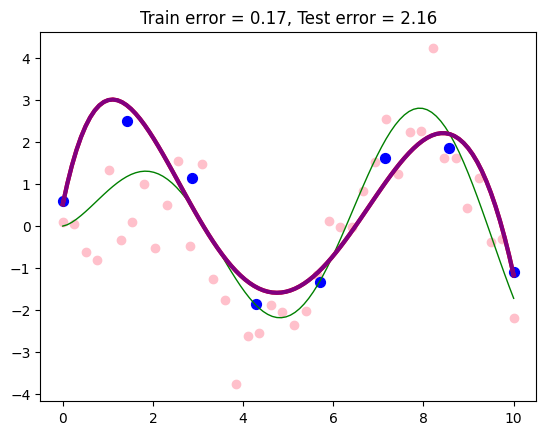

In [ ]:
from numpy import polyfit, polyval

# Pour filtrer les messages d'erreur
import warnings
warnings.simplefilter('ignore', np.RankWarning)

n_samples = 8

# Limites de l'intervalle de régression
x_min = 0
x_max = 10

# Niveau de bruit (écart type)
sigma = 0.8

# Données pour visualiser fonctions
X_plot = np.linspace(x_min, x_max, 100)
y_plot = f(X_plot)

# Initialisation aléatoire
seed = datetime.now().microsecond
rng = np.random.RandomState(seed)

# Données d'apprentissage
X_train, y_train = samples(f, n_samples=n_samples, noise = sigma, x_min=x_min, x_max=x_max, uniform=True)

# Données de test (en plus grande quantité que les données d'apprentissage)
X_test, y_test = samples(f, n_samples=5*n_samples, noise = sigma, x_min=x_min, x_max=x_max, uniform=True)

degree = 5

#########################################################
# METTRE VOTRE CODE ICI

theta = polyfit(X_train, y_train, degree)
print(theta)

y_reg_poly = polyval(theta, X_plot)
y_reg_test = polyval(theta, X_test)
y_reg_train = polyval(theta, X_train)

err_train = ((y_reg_train-y_train)**2).mean()
err_test = ((y_reg_test-y_test)**2).mean()

plt.plot(X_plot, y_plot, color="green", label="Ground Truth", linewidth=1)
plt.plot(X_plot, y_reg_poly, color="red", label="Ground Truth", linewidth=3)
plt.scatter(X_test, y_test, c='pink')
plt.scatter(X_train, y_train,  s=50, marker='o', c='blue')
plt.title("Train error = {:.2f}, Test error = {:.2f}".format(err_train, err_test))


####################################################""

# Version scikit-learn de la régression polynomiale
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

reg_poly = make_pipeline(
    PolynomialFeatures(degree=degree, include_bias=True),
    LinearRegression()
).fit(X_train.reshape((-1,1)), y_train)

y_reg_poly_sk = reg_poly.predict(X_plot.reshape((-1,1)))
y_reg_test = reg_poly.predict(X_test.reshape((-1,1)))
y_reg_train = reg_poly.predict(X_train.reshape((-1,1)))

plt.plot(X_plot, y_reg_poly_sk, color="purple", label="Ground Truth", linewidth=3)

plt.show()


### Impact de la complexité du prédicteur

Une grande erreur de généralisation peut être la conséquence de deux phénomènes distincts:
* Le **sous-apprentissage** ou simplisme, qui est causé par des prédicteurs d'expressivité limitée
* Le **sur-apprentissage** ("overfitting"), qui est causé par l'estimation d'un prédicteur trop souple et incapable d'identifier les régularités dans les données ("par coeur").

Déterminer dans le problème de régression précédent les gammes de prédicteurs minimisant cette erreur de généralisation en fonction du degré du polynôme.

Essayer de reproduire un diagramme comme celui ci-dessous:

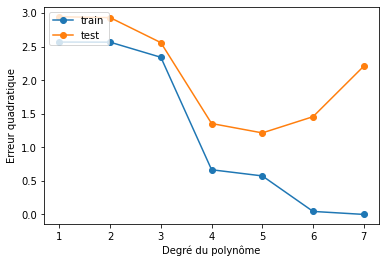





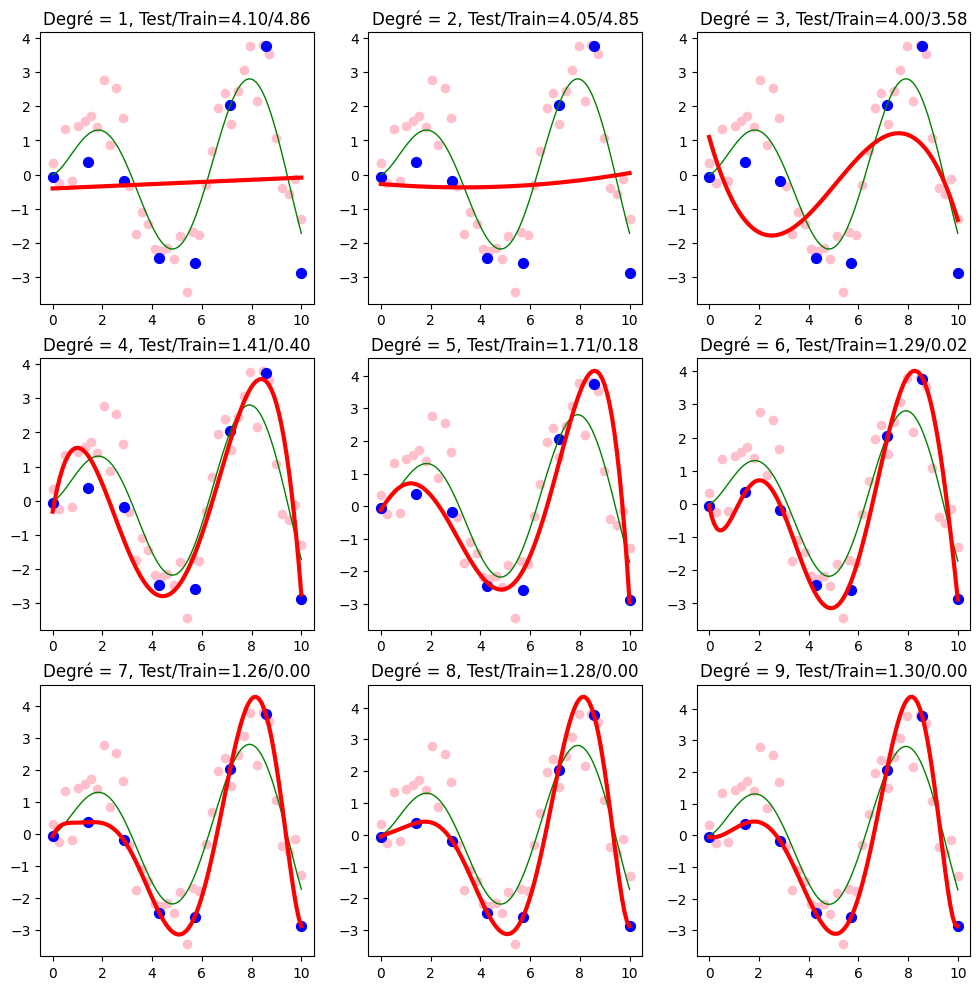

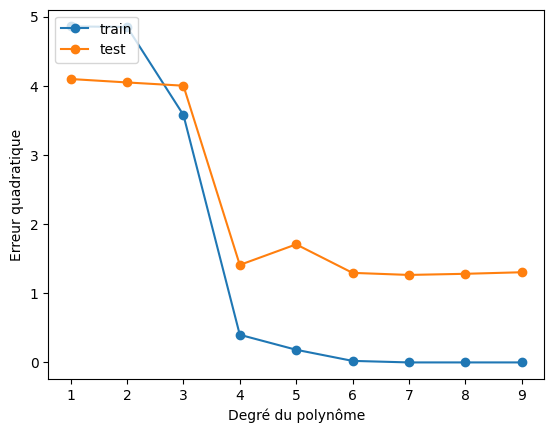

In [ ]:

n_samples = 8

# Initialisation aléatoire
seed = datetime.now().microsecond
rng = np.random.RandomState(seed)

sigma = 0.8

# Données d'apprentissage et de test
X_train, y_train = samples(f, n_samples=n_samples, noise = sigma, x_min=x_min, x_max=x_max, uniform=True)
X_test, y_test = samples(f, n_samples=5*n_samples, noise = sigma, x_min=x_min, x_max=x_max, uniform=True)

#####################################
# Degré max à tester (à définir)
max_degree = 9
degrees = range(1, max_degree+1)
####################################

# Boucle sur les degrés max des polynômes
nc=3
nl=np.ceil(len(degrees)/nc).astype(int)

fig, axs = plt.subplots(nl, nc, figsize=(nc*4, nl*4))

error=[]
for ideg, deg in enumerate(degrees):

  ii = ideg // nc
  jj = ideg % nc

  #####################################
  # METTRE VOTRE CODE ICI
  #

  theta = np.polyfit(X_train, y_train, deg)

  y_reg_poly = np.polyval(theta, X_plot)
  y_reg_test = np.polyval(theta, X_test)
  y_reg_train = np.polyval(theta, X_train)

  err_train = ((y_reg_train-y_train)**2).mean()
  err_test = ((y_reg_test-y_test)**2).mean()

  ###########################################

  error.append([err_train, err_test])

  axs[ii,jj].plot(X_plot, y_plot, color="green", label="Ground Truth", linewidth=1)
  axs[ii,jj].plot(X_plot, y_reg_poly, color="red", label="Ground Truth", linewidth=3)
  axs[ii,jj].scatter(X_test, y_test, c='pink')
  axs[ii,jj].scatter(X_train, y_train,  s=50, marker='o', c='blue')
  axs[ii,jj].set_title("Degré = {}, Test/Train={:.2f}/{:.2f}".format(deg,err_test, err_train))

plt.show()

error = np.array(error)

plt.plot(degrees, error[:,0], label='train', marker='o')
plt.plot(degrees, error[:,1], label='test', marker='o')
plt.xlabel("Degré du polynôme")
plt.ylabel("Erreur quadratique")
plt.legend(loc='upper left')
plt.show()


### Visualisation de la variance d'apprentissage

Nous allons dans cette section visualiser l'impact de la variance d'apprentissage sur l'erreur d'apprentissage.

Pour rappel, on a vu dans le cours que l'on peut décomposer l'erreur de généralisation comme la somme de trois termes dans le cas de la régression appliquée à un modèle à bruit additif:

$$
\begin{align}
err^2 &= E[(\hat{f}_D(x) - y)^2] &\\
&= E[\hat{f}_D(x) - f(x)]^2  &\text{(biais)}\\
& \;\;\; + E[E[\hat{f}_D(x)] - \hat{f}_D(x)]^2 &\text{(variance)}\\
& \;\;\; + E[(y-f(x))^2] &\text{(erreur de Bayes)}
\end{align}
$$
où les espérances mathématiques sont prises sur des échantillons de bases d'apprentissage $D$.


Le code ci-dessous illustre la variation des comportements en fonction du degré du polynôme.

In [ ]:
from collections import defaultdict

# Le problème de régression
n_samples = 8

sigma = .5
x_min = 0
x_max = 10

# Variables de stockage (dictionnaires)
pred_train = defaultdict(list)
pred_test = defaultdict(list)

train_errors = defaultdict(list)
test_errors = defaultdict(list)

theta_hat = defaultdict(list)

# Nombre de tirages de bases d'apprentissage
n_datasets = 50

# Degrés des polynômes à tester
max_poly_degree = 10  # Maximum model complexity
degrees = range(1, max_poly_degree + 1)

# Boucle sur les bases d'apprentissage
for dataset in range(n_datasets):

    # Ensembles d'apprentissage et test. 5 fois plus d'exemples de test
    X_train, y_train = samples(f, n_samples=n_samples, noise = sigma, x_min=x_min, x_max=x_max)
    X_test, y_test = samples(f, n_samples=5*n_samples, noise = sigma, x_min=x_min, x_max=x_max)

    # Boucle sur les degrés des polynômes
    for degree in degrees:
        # Apprentissage du prédicteur et stockage des paramètres
        theta = np.polyfit(X_train, y_train, degree)
        theta_hat[degree].append(theta)

        # Calcul des prédictions sur ensemble d'apprentissage et stockage
        y_reg_train = np.polyval(theta, X_train)
        pred_train[degree].append(y_reg_train)

        # Calcul des prédictions sur ensemble de test et stockage
        y_reg_test = np.polyval(theta, X_test)
        pred_test[degree].append(y_reg_test)

        # Erreurs d'apprentissage et test
        train_errors[degree].append(np.mean((y_reg_train - y_train)**2))
        test_errors[degree].append(np.mean((y_reg_test - y_test)**2))


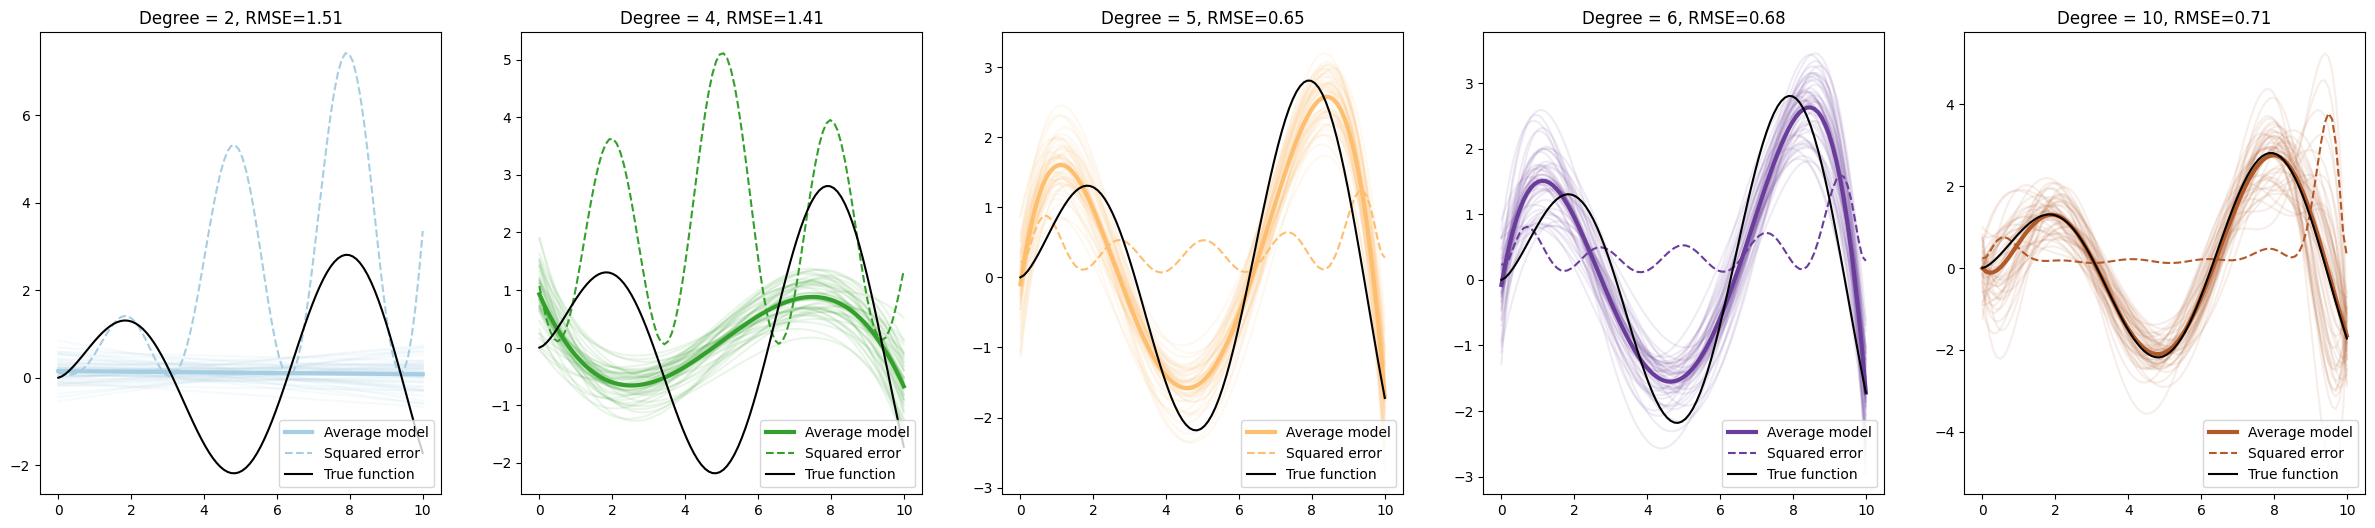

In [ ]:
############## Visualisation ###################

# Sélection de degrés
idegrees = [1,3,4,5,9]

# Colormaps pour la visualisation
cmap = plt.colormaps.get_cmap('Paired')
colors = [cmap(i) for i in np.linspace(0, 1, len(idegrees))]

# Données pour visualiser fonctions
X_plot = np.linspace(x_min, x_max, 100)
y_plot = f(X_plot)

fig, axs = plt.subplots(1, len(idegrees), figsize=(len(idegrees)*6, 6))

for ii, idegree in enumerate(idegrees):
  plt.sca(axs[ii])

  # Calcul et visu de la courbe du prédicteur pour chaque tirage
  sim_fit = []
  squared_errors = []
  for theta in theta_hat[idegree]:
    y_reg_plot = np.polyval(theta, X_plot)
    sim_fit.append(y_reg_plot)
    plt.plot(X_plot, y_reg_plot, color=colors[ii], alpha=.1)
    squared_errors.append((y_reg_plot - y_plot)**2)

  # Estimation du prédicteur moyen
  average_fit = np.array(sim_fit).mean(0)

  # Calcul de l'écart entre prédicteur moyen et fonction idéale
  squared_error = np.array(squared_errors).mean(0)
  #squared_error = (average_fit - y_plot)**2
  rms = np.sqrt(squared_error.mean())

  # Visu des courbes
  plt.plot(X_plot, average_fit, color=colors[ii], linewidth=3, label='Average model')
  plt.plot(X_plot, squared_error, '--', color=colors[ii], label='Squared error')
  plt.plot(X_plot, y_plot, color='black', label='True function')

  plt.title(f"Degree = {degrees[idegree]}, RMSE={np.round(rms, 2)}")
  plt.legend(loc='lower right')


### Estimation du compromis biais/variance

On aimerait générer un graphique comme celui ci-dessous, qui mette en relation les biais et variance d'estimation pour différents degrés des polyômes prédicteurs:

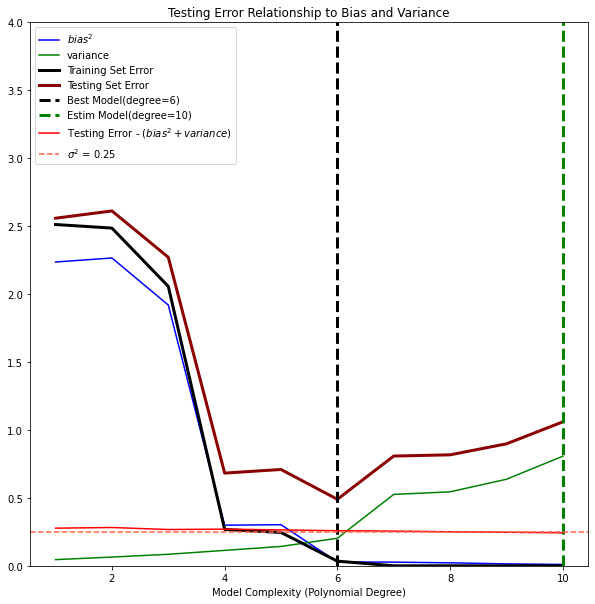

Inspirez-vous des codes précédents pour le faire.

Il faut produire pour chaque degré, à partir de plusieurs tirages des données d'apprentissage, les quantités suivantes:
- L'erreur d'apprentissage moyenne
- L'erreur de test
- L'écart quadratique moyen entre prédiction et fonction idéale (le **biais**)
- L'écart quadratique moyen entre prédiction et prédicteur moyen (la **variance** d'apprentissage)

On pourra vérifier que l'on retrouve bien le bruit du modèle (l'écart type $\sigma$ du bruit additif $\epsilon$) comme différence entre l'erreur de test et la somme du biais et de la variance:

$$err_{RMS}^2 = \sigma^2 + biais^2 + variance$$


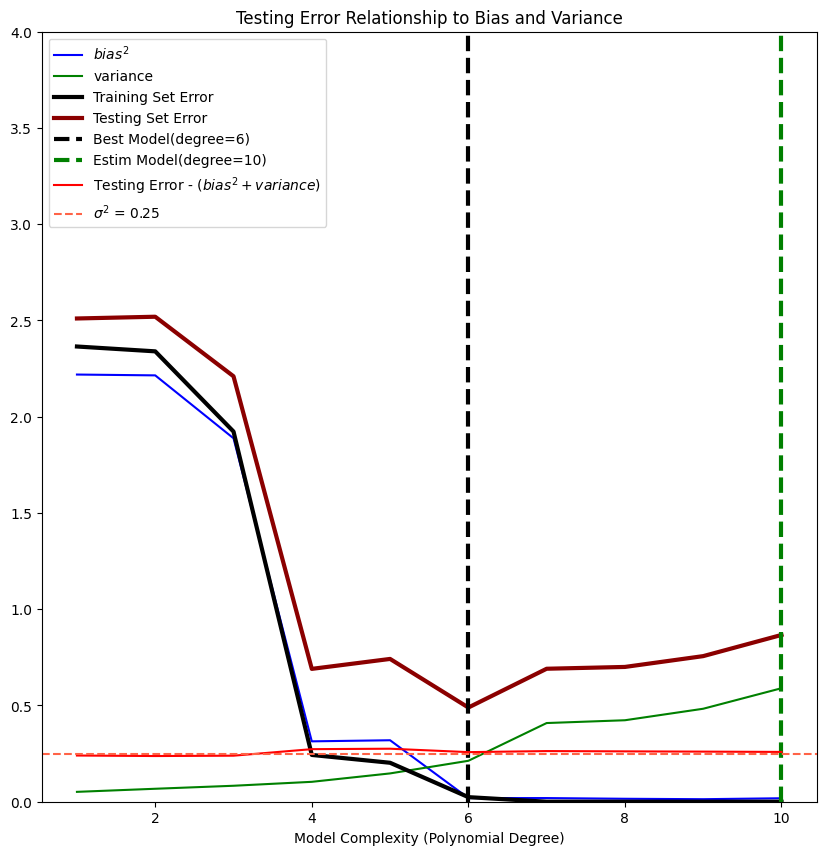

In [ ]:

###############################################
## A RENSEIGNER

poly_train_error = []
poly_test_error = []
bias_squared = []
variance = []

best_model_degree = -1
best_estim_degree = -1

#############################
def calculate_estimator_bias_squared(y_clean_test, pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (E[g(x)] - f(x))^2, averaged across all trials
    return np.mean((average_model_prediction - y_clean_test) ** 2)

def calculate_estimator_variance(pred_test):
    pred_test = np.array(pred_test)
    average_model_prediction = pred_test.mean(0)  # E[g(x)]

    # (g(x) - E[g(x)])^2, averaged across all trials
    return np.mean((pred_test - average_model_prediction) ** 2)


_, y_test = samples(f, n_samples=5*n_samples, noise = sigma, x_min=x_min, x_max=x_max)
y_clean_test = f(X_test)

for degree in degrees:
    poly_train_error.append(np.mean(train_errors[degree]))
    poly_test_error.append(np.mean(test_errors[degree]))
    bias_squared.append(calculate_estimator_bias_squared(y_clean_test, pred_test[degree]))
    variance.append(calculate_estimator_variance(pred_test[degree]))

best_model_degree = degrees[np.argmin(poly_test_error)]
best_estim_degree = degrees[np.argmin(poly_train_error)]

###############################################

# Visualizations
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'

## Plot Bias^2 + variance
fig, axs = plt.subplots(figsize=(10, 10))

plt.plot(degrees, bias_squared, color='blue', label='$bias^2$')
plt.plot(degrees, variance, color='green', label='variance')
plt.plot(degrees, poly_train_error, label='Training Set Error', linewidth=3, color=DATA_COLOR)
#plt.plot(degrees, np.array(bias_squared) + np.array(variance),  linestyle='-.', color='gray', label='$bias^2 + variance$')
plt.plot(degrees, poly_test_error, label='Testing Set Error', linewidth=3, color=ERROR_COLOR)
plt.axvline(best_model_degree, linestyle='--', color='black', label=f'Best Model(degree={best_model_degree})', linewidth=3)
plt.axvline(best_estim_degree, linestyle='--', color='green', label=f'Estim Model(degree={best_estim_degree})', linewidth=3)
plt.plot(degrees, np.array(poly_test_error) - (np.array(bias_squared) + np.array(variance)), color='red', label='Testing Error - ($bias^2 + variance$)')
plt.axhline(sigma **2, color='tomato', linestyle='--', label=f'$\sigma^2$ = {round(sigma**2, 3)}')

plt.xlabel('Model Complexity (Polynomial Degree)')
plt.ylim([0, 4.0]);
plt.legend()
plt.title('Testing Error Relationship to Bias and Variance')

plt.show()


## Validation croisée

La technique de validation croisée permet d'estimer l'erreur de généralisation lorsque l'on dispose d'un jeu limité de données. Son principe est de simuler des ensembles de tests fictifs (appelés ensemble de **validation**) à partir des données d'apprentissage, et d'estimer les performances sur ces données de validation.



In [ ]:
## Elements de codes utiles pour visualisation (à exécuter)
import warnings
warnings.simplefilter('ignore', np.RankWarning)
warnings.simplefilter('ignore', RuntimeWarning)

# Visualisation des données en deux dimension
def show_data_2D(X,Y,ax=None, s=30):
    np.unique(Y)
    if ax is None:
        ax = plt.gca()
    for id in np.unique(Y):
        idpositive=np.nonzero(Y == id)[0]
        ax.scatter(X[idpositive,0], X[idpositive,1], s=s)

# Visualisation des fonctions séparatrices en deux dimensions
def plot_decision_function(decision_function, ax=None, margin=False):
    """Plot the decision function """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 200)
    y = np.linspace(ylim[0], ylim[1], 200)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    score = decision_function(xy)

    if score.ndim == 1 :
      P = score.reshape(X.shape)
    else:
      P = (score[:,1]-score[:,0]).reshape(X.shape)

    Z = 1*(P>0) -1*(P<=0)
    ax.contourf(X, Y, Z,  alpha=0.2)

    # plot decision boundary and margins
    if margin:
      ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    else:
      ax.contour(X, Y, P, colors='k',
                levels=[0], alpha=0.5,
                linestyles=['-'])

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


### Influence des hyper-paramètres

La validation croisée est utilisée ici pour estimer les **hypermaramètres** de certaines familles de prédicteurs: ce sont des paramètres de dimension réduite, mais que l'on ne peut estimer itérativement. Ils ont en général un impact global et structurel sur le prédicteur.

Des hyper-paramètres classiques sont le nombre de voisins pour le kNN, la profondeur maximale pour les arbres de décision, les paramètres de régularisation (prochain cours).

Le problème de classification traité est généré par le code ci-dessous. Il est paramétrable par un facteur de bruit qui permet de produire différents niveaux de confusion.

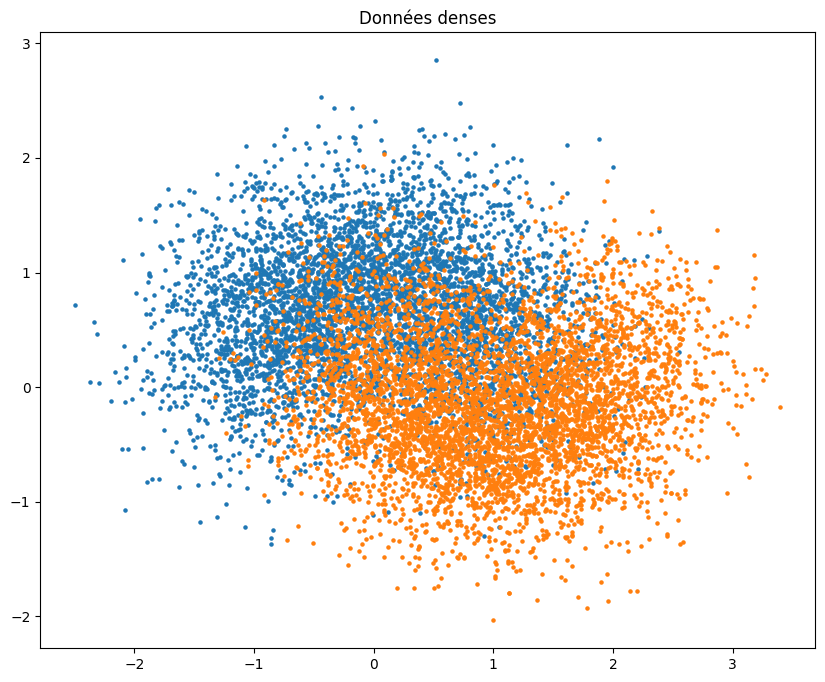

In [ ]:
from sklearn.datasets import make_moons

# Paramètre réglant la distribution spatiale des données
noise = 0.5

#random_state = 42
random_state = datetime.now().microsecond

# Données de test
X_test, y_test = make_moons(noise=noise, random_state=random_state, n_samples=10000)

fig, ax = plt.subplots(figsize=(10, 8))
show_data_2D(X_test,y_test,ax=ax, s=5)
plt.title("Données denses")
plt.show()


Les codes ci-dessous mettent en relation trois familles de prédicteurs que nous avons vus dans le cours. Ils sont caractérisés par différents **hyperparamètres**. Identifiez-les et jouez avec leur valeurs pour produire différents comportements.

Pour le modèle de discrimination polynomiale, on utilise la structure [`pipeline`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) de scikit-learn. Les paramètres des différents éléments de la chaîne peuvent être modifiés en utilisant la syntaxe: `<estimator name>__<parameter name>`.

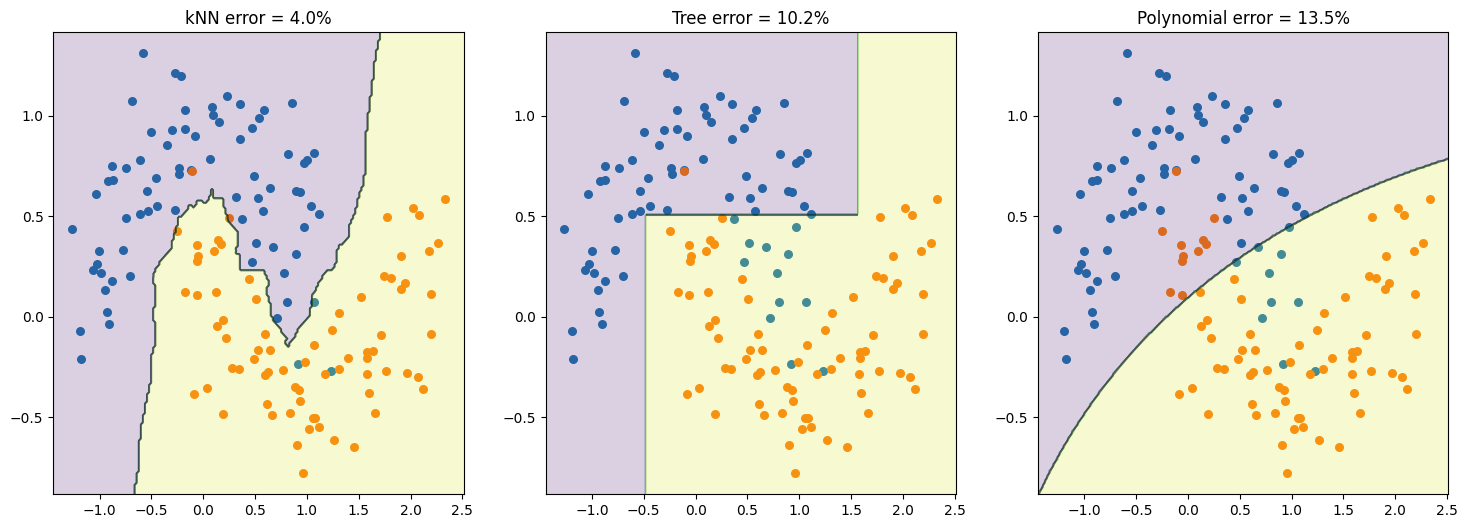

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Données d'apprentissage
random_state = 12
noise = 0.2
X_train, y_train = make_moons(noise=noise, random_state=random_state, n_samples=150)
X_test, y_test = make_moons(noise=noise, random_state=random_state, n_samples=10000)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# k plus proches voisins
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

plt.sca(axs[0])
show_data_2D(X_train, y_train)
plot_decision_function(knn.predict_proba)
plt.title("kNN error = {:.1f}%".format(100*(1-knn.score(X_test, y_test))))

# Arbre de décision
tree = DecisionTreeClassifier(random_state=0, max_depth=10, min_samples_split = 50)
tree.fit(X_train, y_train)

plt.sca(axs[1])
show_data_2D(X_train, y_train)
plot_decision_function(tree.predict_log_proba)
plt.title("Tree error = {:.1f}%".format(100*(1-tree.score(X_test, y_test))))

# Discrimination polynomiale
# Ici le modèle utilise une structure "pipeline"
# pour enchaîner augmentation polynomiale et discrimination linéaire
pda = Pipeline(steps=[("PolyAugment", PolynomialFeatures(degree=2,include_bias=True)),
     ("LinearDiscriminant", LinearDiscriminantAnalysis())]
     ).fit(X_train, y_train)

plt.sca(axs[2])
show_data_2D(X_train, y_train)
plot_decision_function(pda.predict_log_proba)
plt.title("Polynomial error = {:.1f}%".format(100*(1-pda.score(X_test, y_test))))


plt.show()


### Optimisation des hyperparamètres

Pour optimiser de manière systématique les hyperparamètres, une stratégie classique est d'effectuer une recherche exhaustive en calculant les performances sur une grille échantillonnant de manière indépendante chacun des paramètres. C'est ce qui est fait par la classe [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) qui permet de caler ("fit") un prédicteur optimisant la gamme d'hyperparamètres.

Inspirez-vous de l'exemple ci-dessous appliqué pour une famille de prédicteurs (le kNN) et adaptez-le le aux deux autres familles.


KNeighborsClassifier()
Lowest kNN error = 4.0%
DecisionTreeClassifier(max_depth=6, min_samples_split=5)
Lowest DTree error = 8.7%
Pipeline(steps=[('PolyAugment', PolynomialFeatures(degree=5)),
                ('LinearDiscriminant', LinearDiscriminantAnalysis())])
Lowest PDA error = 6.7%


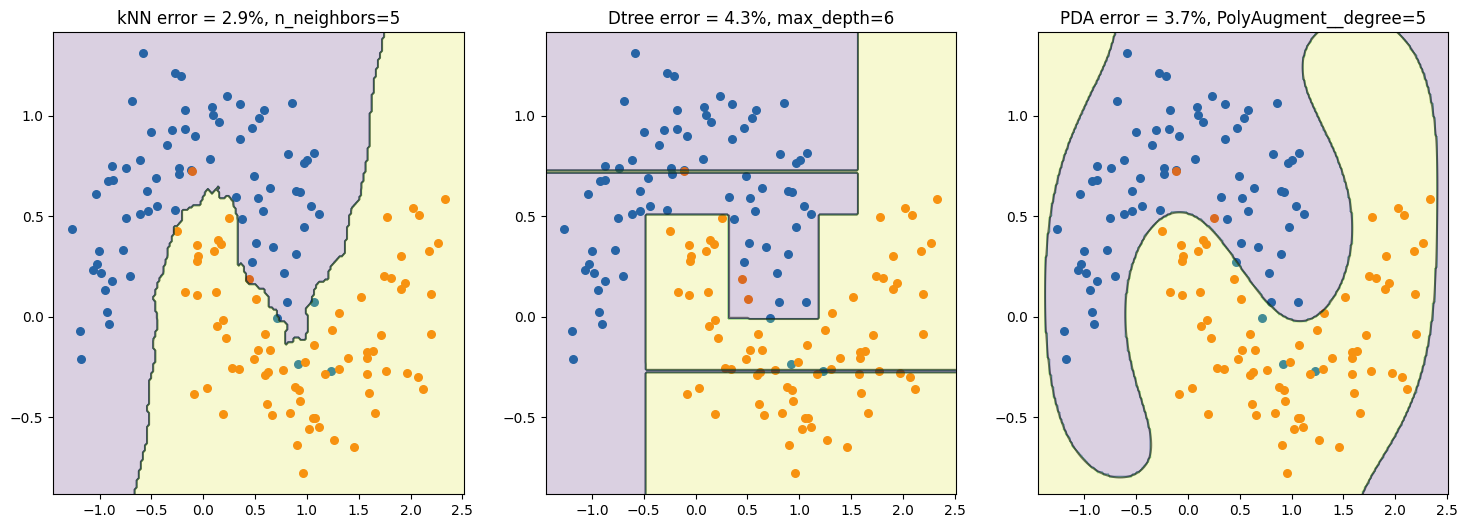

In [ ]:
from sklearn.model_selection import GridSearchCV

random_state = datetime.now().microsecond
random_state = 12
noise = 0.2
X_train, y_train = make_moons(noise=noise, random_state=random_state, n_samples=150)
X_test, y_test = make_moons(noise=noise, random_state=random_state, n_samples=1000)

# Plus proches voisins
knn = KNeighborsClassifier()
param_grid={'n_neighbors':[1, 3, 5, 7, 9, 11, 13]}

knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_estimator_)
print("Lowest kNN error = {:.1f}%".format(100*(1-knn_cv.best_score_)))

# Visualisation
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

plt.sca(axs[0])
show_data_2D(X_train, y_train)
plot_decision_function(knn_cv.best_estimator_.predict_proba)
score = knn_cv.best_estimator_.score(X_test, y_test)
best_params = knn_cv.best_params_
plt.title("kNN error = {:.1f}%, {}={}".format(100*(1-score),list(best_params)[0],best_params[list(best_params)[0]]))

##############################################""
# METTRE VOTRE CODE ICI

# Arbres de décision
tree = DecisionTreeClassifier()
param_grid={'max_depth':range(1,11), 'min_samples_split':[2,5,10,15,20]}

tree_cv = GridSearchCV(tree, param_grid, cv=10)
tree_cv.fit(X_train, y_train)

print(tree_cv.best_estimator_)
print("Lowest DTree error = {:.1f}%".format(100*(1-tree_cv.best_score_)))

# Discrimination polynomiale

pda = Pipeline(steps=[("PolyAugment", PolynomialFeatures(include_bias=True)),
     ("LinearDiscriminant", LinearDiscriminantAnalysis())]
     ).fit(X_train, y_train)

param_grid={'PolyAugment__degree':[1,2,3,4,5]}

pda_cv = GridSearchCV(pda, param_grid, cv=10)
pda_cv.fit(X_train, y_train)

print(pda_cv.best_estimator_)
print("Lowest PDA error = {:.1f}%".format(100*(1-pda_cv.best_score_)))

plt.sca(axs[1])
show_data_2D(X_train, y_train)
plot_decision_function(tree_cv.best_estimator_.predict_proba)
score = tree_cv.best_estimator_.score(X_test, y_test)
best_params = tree_cv.best_params_
plt.title("Dtree error = {:.1f}%, {}={}".format(100*(1-score),list(best_params)[0],best_params[list(best_params)[0]]))

plt.sca(axs[2])
show_data_2D(X_train, y_train)
plot_decision_function(pda_cv.best_estimator_.predict_proba)
score = pda_cv.best_estimator_.score(X_test, y_test)
best_params = pda_cv.best_params_
plt.title("PDA error = {:.1f}%, {}={}".format(100*(1-score),list(best_params)[0],best_params[list(best_params)[0]]))

##############################################""

plt.show()
